In [1]:
# meòe likert c'è access to care
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
import matplotlib

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

def job(x):
    if type(x)==str:
        x = x.lower().split(",")[0].strip() # primary occupation
        if x in ['adult psychiatrist',"women's health psychiatry",'forensic psychiatrist','psychiatry resident','child & adolescent psychiatrist']:
            x = 'Clinician'
        elif x in ['org psych','mental health counselor','vocational worker','psychologist','psychotherapist', 'psychoanalyst']:
            x = 'Psychologist'
        elif x in []:
            x = 'Other'
    return x


surv = pd.read_csv("survey_eng.tsv",sep="\t")
surv.iloc[:,6] = surv.iloc[:,6].apply(job)
surv.head(3)

,Informazioni cronologiche,I agree to participate in the research study. I understand the purpose and nature of this study and I am participating voluntarily. I grant permission for the data generated from this interview to be used in the researcher's publications on this topic.,Age,Gender,Country where you work,Type of Mental Health Service,Type of Mental Health Professional,Is your area provided with an electronic health record?,Was your normal practice disrupted during the emergency?,"If yes, which was the main reason for such disruption?",...,Telepsychiatry is expensive,"Telepsychiatry is as valid, accurate and effective as face-to-face care",Telepsychiatry allows to establish a good doctor-patient relationship,Telepsychiatry allows to save time and fits well into my daily schedule,"Telepsychiatry is advantageous on the patient side as it reduces the need for time off work, childcare services, etc. to access appointments",Telepsychiatry comes with confidentiality issues that limit its employ,Telepsychiatry improves access to mental health specialty care that might not otherwise be available,Telepsychiatry reduces the barrier of stigma,I am enough prepared to use telecommunications in my practice,I am satisfied with the care I am able to provide using telepsychiatry
0,30/05/2020 13.17.52,Yes,31-40,Female,Kenya,"Public mental health outpatient clinic, Public...",Clinician,No,Yes,Lockdown,...,2.0,3.0,3.0,5.0,5.0,4.0,5.0,3.0,5.0,4.0
1,30/05/2020 14.31.45,Yes,20-30,Female,Portugal,"Public mental health outpatient clinic, Public...",Clinician,Yes,Yes,Lockdown,...,4.0,1.0,2.0,2.0,4.0,4.0,3.0,3.0,4.0,3.0
2,30/05/2020 15.49.25,Yes,20-30,Female,Spain,"Public mental health outpatient clinic, Public...",Psychologist,Yes,Yes,My ward was converted to COVID-19 intensive/su...,...,3.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0


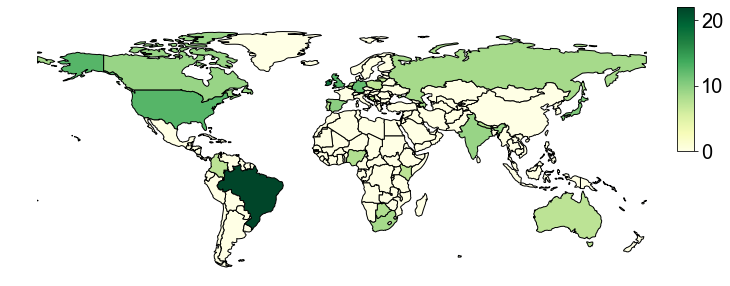

In [2]:
surv.iloc[:,4] = surv.iloc[:,4].apply(lambda x: x.lower().strip())

for i,c in enumerate(surv.iloc[:,4]):
    if c.lower() in ['uk', 'united kingdom (scotland)']:
        surv.iloc[i,4] = 'united kingdom'
    if c.lower() in ['brasil']:
        surv.iloc[i,4] = 'brazil'
    if c.lower() in ['usa', 'united states']:
        surv.iloc[i,4] = 'united states of america'
    if c.lower() in ['russian federation']:
        surv.iloc[i,4] = 'russia'    
    if c.lower() in ['korea, south']:
        surv.iloc[i,4] = 'korea'    
    
    
import geopandas as gpd

#import world shape map externally, no need to have a saved file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

import pycountry
surv["Country"]=np.nan
for i,c in enumerate(surv["Country where you work"]):
    if c=="korea":
        surv.loc[i,"Country"] = "KR"
    elif c!="europe":
        temp = pycountry.countries.search_fuzzy(c)
        surv.loc[i,"Country"] = temp[0].alpha_3
        
nat_count = surv["Country"].value_counts().reset_index().rename(columns = dict(Country="Num",index="Country"))
#nat_count["Num"] = 100 * (nat_count["Num"]/nat_count["Num"].sum())
for_plotting = world[world["continent"]!="Antarctica"].merge(nat_count, left_on = 'iso_a3', right_on = 'Country',how="outer")
for_plotting["Num"].fillna(-10, inplace=True,)
for_plotting.head(2)

fig, ax =plt.subplots(figsize=(12,10))
for_plotting.plot(column='Num', 
                  cmap = 'YlGn', ax=ax  ,legend = False,
                    scheme=None, k=3,
                    edgecolor="black",facecolor="white")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

cax = fig.add_axes([.9, 0.5, 0.02, 0.2])
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=0, vmax=22))
sm._A = []
cbr = fig.colorbar(sm, cax=cax)
cbr.ax.tick_params(labelsize=20) 


If yes, how much was your practice affected?


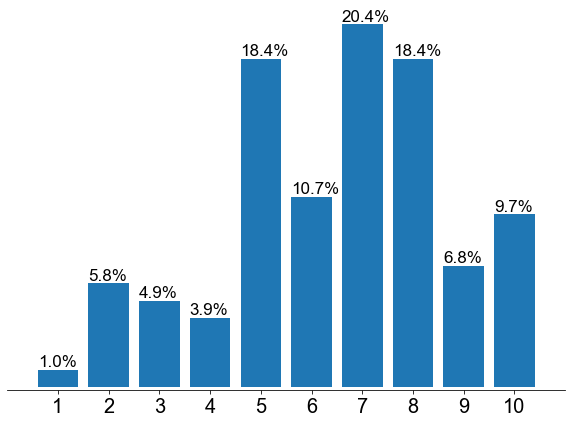

In [3]:
# Se ha risposto sì, quantifichi l'impatto dell'emergenza sulla sua attività lavorativa
print(surv.columns[10])
import seaborn as sns
temp = surv[surv.columns[10]].dropna().astype(int).value_counts()
temp = 100 *(temp / temp.sum()) 
temp = temp.sort_index()
fig,ax = plt.subplots(figsize=(10,7))
ax.bar(temp.index, temp.values, align='center')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 3))
ax.set_xlim(0,11)
ax.set_xbound(0,11)
ax.set_xticks((1,2,3,4,5,6,7,8,9,10))
ax.set_yticks(())

for i,(l,n) in enumerate(temp.items()):
    if  n>=10:
        plt.text(x = i+.6 , y = n+.2 , s = str(round(n,1))+'%' , size = 17, color="black")
    else:
        plt.text(x = i+.6 , y = n+.2 , s = str(round(n,1))+'%' , size = 17, color="black")

How have you provided mental health care DURING the emergency?


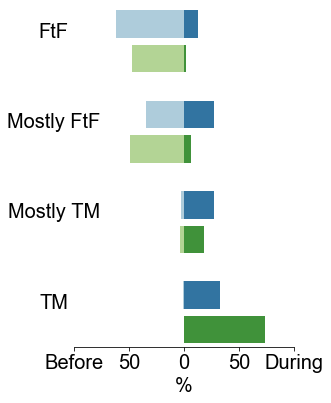

In [4]:
print(surv.columns[11])

def mode_work(x):
    if type(x)==str:
        x = x
        if x in ["Exclusively remotely, using telecommunications"]:
            x = 'TM'
        elif x in ["Mixed, mostly remotely using telecommunications"]:
            x = 'Mostly TM'
        elif x in ["Mixed, mostly face-to-face"]:
            x = 'Mostly FtF'
        elif x in ["Exclusively face-to-face"]:
            x = 'FtF'
    return x

modal = surv.iloc[:,[6,17,11]]
modal = modal.rename(columns={"Type of Mental Health Professional":"role","How did you use to provide mental health care BEFORE the emergency?":"before","How have you provided mental health care DURING the emergency?":"during"})
modal = modal.dropna().reset_index(drop=True)
modal = modal.apply(job)

modal["before"] = modal["before"].apply(mode_work)
modal["during"] = modal["during"].apply(mode_work)

before = modal.iloc[:,[0,1]].groupby(["role","before"]).size().reset_index()
before["when"] = "before"
before = before.rename(columns={"before":"perc",0:"value"})
before["value"] = 100 * (before["value"]/before["value"].sum())

during = modal.iloc[:,[0,2]].groupby(["role","during"]).size().reset_index()
during["when"] = "during"
during=during.rename(columns={"during":"perc",0:"value"})
during["value"] = 100 * (during["value"]/during["value"].sum())

alt = pd.concat([before,during])



bef = alt["when"]=="before"
dur = alt["when"]=="during"

for r in alt["role"].unique():
    rl = alt["role"]==r
    alt.loc[bef & rl,"value"]= -100 * ( alt.loc[bef & rl,"value"] / alt.loc[bef & rl,"value"].sum())    
    alt.loc[dur & rl,"value"]= 100 * ( alt.loc[dur & rl,"value"] / alt.loc[dur & rl,"value"].sum())    
    
percs = ['TM', 'Mostly TM', 'Mostly FtF', 'FtF']
percs.reverse()

fig,axs = plt.subplots(len(percs),1,figsize=(5,6))

for j,ax in enumerate(axs):
    temp = alt[alt["perc"]==percs[j]]
    when_c = dict(before=['#a6cee3','#b2df8a','#fb9a99'],during=['#1f78b4','#33a02c','#e31a1c'])
    for i,w in enumerate(["before","during"]):
        if np.any(temp[temp["when"]==w]):
            when = temp[temp["when"]==w]
        else:
            when["value"]=0
            
        sns.barplot(ax = ax, data=when,x="value",y="role",palette=when_c[w])
        ax.set_ylabel(percs[j],rotation=0,labelpad=20)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False) 
        ax.set_xlim(-100,100)
        ax.set_yticks([])
        if j!=len(percs)-1:
            ax.spines['bottom'].set_visible(False)
            ax.set_xlabel("")
            ax.set_xticklabels([])
            ax.set_xticks([])
        else:
            ax.set_xlabel("%")
            ax.set_xticks((-100,-50,0,50,100))
            
            ax.set_xticklabels(["Before","50","0","50","During"])
    ax.set_yticklabels([])
plt.tight_layout()

What percentage of your mental health care have you provided using telecommunications DURING the emergency?
What percentage of your mental health care were you providing using telecommunications BEFORE the emergency?


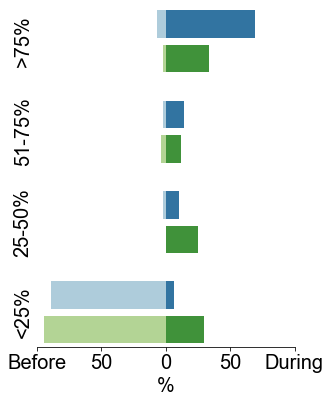

In [5]:
print(surv.columns[15])
print(surv.columns[20])

durante = surv[surv.columns[[6,15]]].dropna().reset_index(drop=True).copy()
prima = surv[surv.columns[[6,20]]].dropna().reset_index(drop=True).copy()
durante.columns=["role","perc"]
prima.columns=["role","perc"]
durante.iloc[:,0] = durante.iloc[:,0].apply(job)
prima.iloc[:,0] = prima.iloc[:,0].apply(job)

def perce(x):
    x=x.lower()

    if x in ["less than 25%"]:
        x = "<25%"
    elif x in ["more than 75%"]:
        x = ">75%"
    return x

durante.iloc[:,1] = durante.iloc[:,1].apply(perce)
prima.iloc[:,1] = prima.iloc[:,1].apply(perce)

prima = prima.groupby(["role","perc"]).size().reset_index()
prima["when"] = "before"
durante = durante.groupby(["role","perc"]).size().reset_index()
durante["when"] = "during"

alt = pd.concat([prima,durante])
alt = alt.rename(columns={0:"value"})

bef = alt["when"]=="before"
dur = alt["when"]=="during"

for r in alt["role"].unique():
    rl = alt["role"]==r
    alt.loc[bef & rl,"value"]= -100 * ( alt.loc[bef & rl,"value"] / alt.loc[bef & rl,"value"].sum())    
    alt.loc[dur & rl,"value"]= 100 * ( alt.loc[dur & rl,"value"] / alt.loc[dur & rl,"value"].sum())    
    
percs = ['<25%', '25-50%', '51-75%', '>75%']
percs.reverse()

fig,axs = plt.subplots(len(percs),1,figsize=(5,6))

for j,ax in enumerate(axs):
    temp = alt[alt["perc"]==percs[j]]
    when_c = dict(before=['#a6cee3','#b2df8a','#fb9a99'],during=['#1f78b4','#33a02c','#e31a1c'])
    for i,w in enumerate(["before","during"]):
        when = temp[temp["when"]==w]
        sns.barplot(ax = ax, data=when,x="value",y="role",palette=when_c[w])
        ax.set_ylabel(percs[j])
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False) 
        ax.set_xlim(-100,100)
        ax.set_yticks([])
        if j!=len(percs)-1:
            ax.spines['bottom'].set_visible(False)
            ax.set_xlabel("")
            ax.set_xticklabels([])
            ax.set_xticks([])
        else:
            ax.set_xlabel("%")
            ax.set_xticks((-100,-50,0,50,100))
            
            ax.set_xticklabels(["Before","50","0","50","During"])
    ax.set_yticklabels([])
plt.tight_layout()

Which of the following tools have you used DURING the emergency to provide mental health care?
Which of the following tools were you using BEFORE the emergency to provide mental health care?


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
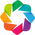

:Sankey   [when,tool]   (value)

In [6]:

print(surv.columns[12])
print(surv.columns[18])

from collections import Counter
import re 

def tool(x):
    x=x

    if x in ['Phone (calls, texts)']:
        x = "Phone"
    elif x in ['Videoconferencing',"Skype",'I used doxy.me for online video sessions',"Skype but stopped using it due to GDPR concerns"]:
        x = "VTC"
    elif x in ['Chat (Whatsapp, Telegram etc)']:
        x = "IM"
    elif x in ['e-mail']:
        x = 'e-mail'
    elif x in ['Supported telemedicine system']:
        x = 'STM'
    elif x in ['Electronic health record']:
        x = 'EHR'
    elif x in ["face to face",'Emergency services were open','Home visits to clients wearing PPE',"Emergency services in the college","none"]:
        x = np.nan
        
    return x

during = surv[surv.columns[12]].dropna().reset_index(drop=True).copy()
before = surv[surv.columns[18]].dropna().reset_index(drop=True).copy()

r = re.compile(r'(?:[^,(]|\([^)]*\))+')
during = [tool(s.strip()) for dur in during for s in r.findall(dur)]
before = [tool(s.strip()) for dur in before for s in r.findall(dur)]

during = pd.DataFrame( Counter(during).items() )
during = during.rename(columns={0:"tool",1:"value"})
during["value"] = 100*(during["value"]/during["value"].sum())
during["when"] ="during"
during=during.dropna(how = "any")

before = pd.DataFrame( Counter(before).items() )
before = before.rename(columns={0:"tool",1:"value"})
before["value"] = 100*(before["value"]/before["value"].sum())
before["when"] = "before"
before = before.dropna(how = "any")

import holoviews as hv
hv.extension('bokeh')


alt = pd.concat([before,during]).reset_index(drop=True).sort_values(by="tool")

sankey1 = hv.Sankey(alt, kdims=["when","tool"], vdims=["value"])

sankey1.opts(cmap='Colorblind',label_position='outer',
                                 edge_color='tool', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=500, height=400, bgcolor="white",toolbar=None)



Have you found telepsychiatry useful to reach out and support patients DURING the emergency?
Did you find telepsychiatry useful to reach out and support patients BEFORE the emergency?


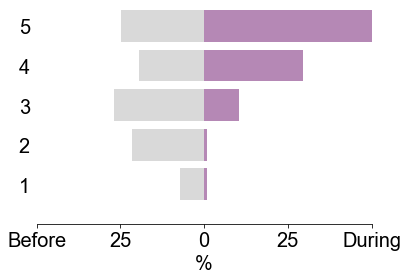

In [7]:
print(surv.columns[16])
print(surv.columns[21])

during = surv[surv.columns[16]].dropna().reset_index(drop=True).copy()
before = surv[surv.columns[21]].dropna().reset_index(drop=True).copy()

before = pd.DataFrame(before.value_counts().sort_index()).reset_index()
before = before.rename(columns={"index":"judge","Did you find telepsychiatry useful to reach out and support patients BEFORE the emergency?":"value"})
before.value = -100*(before.value/before.value.sum())

during = pd.DataFrame(during.value_counts().sort_index()).reset_index()
during = during.rename(columns={"index":"judge","Have you found telepsychiatry useful to reach out and support patients DURING the emergency?":"value"})
during.value = 100*(during.value/during.value.sum())

during.judge = [str(int(s))+"l" for s in during.judge]
before.judge = [str(int(s))+"l" for s in before.judge]


fig, ax = plt.subplots()

sns.barplot( y='judge', x='value', data=during, color='#bc80bd',ci=None, order=["5l","4l","3l","2l","1l"])
sns.barplot( y='judge', x='value', data=before, color="#d9d9d9",ci=None, order=["5l","4l","3l","2l","1l"])

ax.set_xlim(-50,50)
ax.set_ylabel("")
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False) #axis="y",which="minor")

ax.set_xlabel("%")
ax.set_xticks((-50,-25,0,25,50))
ax.set_xticklabels(["Before","25","0","25","During"])
ax.set_yticks((0,1,2,3,4,5))
ax.set_yticklabels([5,4,3,2,1])
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,
    labelleft=True) # labels along the bottom edge are off



Which of the following disorders would you treat using telepsychiatry?


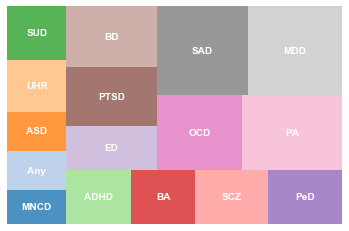

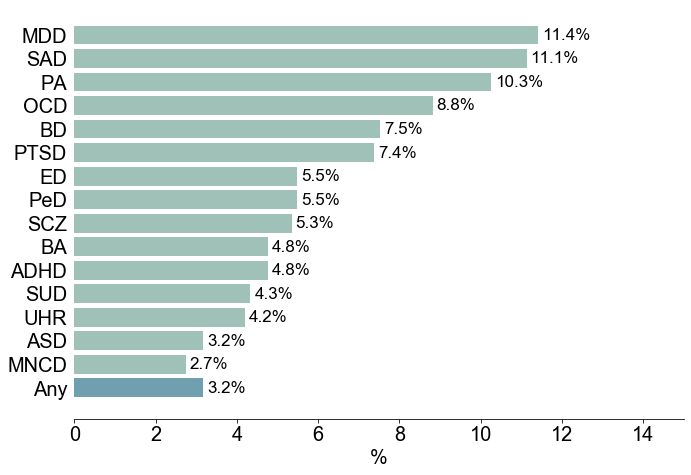

In [8]:
print(surv.columns[24])
disorders = surv[surv.columns[24]].dropna().reset_index(drop=True).copy()

disorders = disorders.apply(lambda x: [i.strip() for i in x.lower().split(",")]).explode().value_counts().reset_index().rename(columns={"index":"disorder","Which of the following disorders would you treat using telepsychiatry?":"value"})

disorders["value"] = 100 * (disorders["value"]/disorders["value"].sum())

def dis(x):
    if x in ["social anxiety"]:
        x="SAD"
    elif x in ["panic disorder"]:
        x="PA"
    elif x in ["depressive disorders"]:
        x="MDD"
    elif x in ["any"]:
        x="Any"
    elif x in ["obsessive-compulsive disorder and related disorders"]:
        x="OCD"
    elif x in ["personality disorders"]:
        x="PeD"
    elif x in ["post-traumatic stress disorder"]:
        x="PTSD"
    elif x in ["bipolar disorders"]:
        x="BD"
    elif x in ["eating disorders"]:
        x="ED"
    elif x in ["behavioral addictions"]:
        x="BA"
    elif x in ["autism spectrum disorders"]:
        x="ASD"
    elif x in ["clinical high risk for psychosis (uhr)"]:
        x="UHR"
    elif x in ["adhd"]:
        x="ADHD"
    elif x in ["schizophrenia and other psychotic disorders"]:
        x="SCZ"
    elif x in ["neurocognitive disorders"]:
        x="MNCD"
    elif x in ["substance use disorders"]:
        x="SUD"
    return x


disorders["disorder"] = disorders["disorder"].apply(dis)
disorders = disorders.sort_values(by="value").reset_index(drop=True)

squarify.plot(sizes=disorders['value'], label=disorders['disorder'], alpha=.8,color=sns.color_palette("tab20"),text_kwargs={'fontsize':10,"color":"white",'weight':'bold'})
plt.axis('off')
plt.show()

alld = disorders[disorders["disorder"]!="Any"].reset_index(drop=True)
anyd = disorders[disorders["disorder"]=="Any"].reset_index(drop=True)

fig,ax = plt.subplots(figsize=(10,7))
ax.barh(alld.disorder, alld.value, align='center',color="#a0c1b8")
ax.barh(-1, anyd.value, align='center',color="#709fb0")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 3))

names = list(alld.disorder.values)
names.reverse()
names.extend(["Any"])
names.reverse()

ax.set_yticks(range(-1,len(names)-1))
ax.set_yticklabels(names)
ax.set_xlim((0,15))
ax.set_xlabel("%")
for i,r in alld.iterrows():
    plt.text(x =  r.value+.1, y = i-.2 , s = str(round(r.value,1))+'%' , size = 17, color="black")
plt.text(y =-1.2, x = anyd.value+.1 , s = str(round(anyd.value[0],1))+'%' , size = 17, color="black")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,
    labelleft=True) # labels along the bottom edge are off
    
plt.tight_layout()

Which of the following groups would benefit the most from telepsychiatry in your opinion?


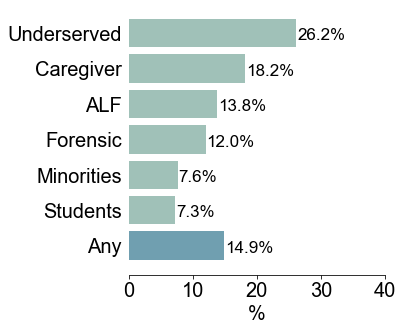

In [23]:
print(surv.columns[23])
pops = surv[surv.columns[23]].dropna().reset_index(drop=True).copy()
pops = pops.apply(lambda x: [i.strip() for i in x.lower().split(",")]).explode().value_counts().reset_index().rename(columns={"index":"popul","Which of the following groups would benefit the most from telepsychiatry in your opinion?":"value"})
pops = pops[pops["value"]>1]

def pp(x):
    if x in ['patients living in rural/remote settings']:
        x="Underserved"
    elif x in ['caregivers of patients suffering with chronic conditions']:
        x="Caregiver"
    elif x in ["patients in school settings"]:
        x="Students"
    elif x in ["any"]:
        x="Any"
    elif x in ["patients in prison"]:
        x="Forensic"
    elif x in ['patients in assisted living facilities']:
        x="ALF"
    elif x in ['patients belonging to minority groups']:
        x="Minorities"
    
    return x

pops["popul"] = pops["popul"].apply(pp)
pops["value"] = 100 * ( pops["value"]/pops["value"].sum() )
pops = pops.sort_values(by="value").reset_index(drop=True)

alld = pops[pops["popul"]!="Any"].reset_index(drop=True)
anyd = pops[pops["popul"]=="Any"].reset_index(drop=True)

fig,ax = plt.subplots(figsize=(6,5))
ax.barh(alld.popul, alld.value, align='center',color="#a0c1b8")
ax.barh(-1, anyd.value, align='center',color="#709fb0")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 3))

names = list(alld.popul.values)
names.reverse()
names.extend(["Any"])
names.reverse()

ax.set_yticks(range(-1,len(names)-1))
ax.set_yticklabels(names)
ax.set_xlim((0,40))
ax.set_xlabel("%")

for i,r in alld.iterrows():
    plt.text(x =  r.value+.1, y = i-.2 , s = str(round(r.value,1))+'%' , size = 17, color="black")
plt.text(y =-1.2, x = anyd.value+.1 , s = str(round(anyd.value[0],1))+'%' , size = 17, color="black")

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,
    labelleft=True) # labels along the bottom edge are off
    
    
plt.tight_layout()


0 Telepsychiatry is widely implemented in my Country
1 Telepsychiatry is expensive
2 Telepsychiatry is as valid, accurate and effective as face-to-face care
3 Telepsychiatry allows to establish a good doctor-patient relationship
4 Telepsychiatry allows to save time and fits well into my daily schedule
5 Telepsychiatry is advantageous on the patient side as it reduces the need for time off work, childcare services, etc. to access appointments
6 Telepsychiatry comes with confidentiality issues that limit its employ
7 Telepsychiatry improves access to mental health specialty care that might not otherwise be available
8 Telepsychiatry reduces the barrier of stigma
9 I am enough prepared to use telecommunications in my practice
10 I am satisfied with the care I am able to provide using telepsychiatry


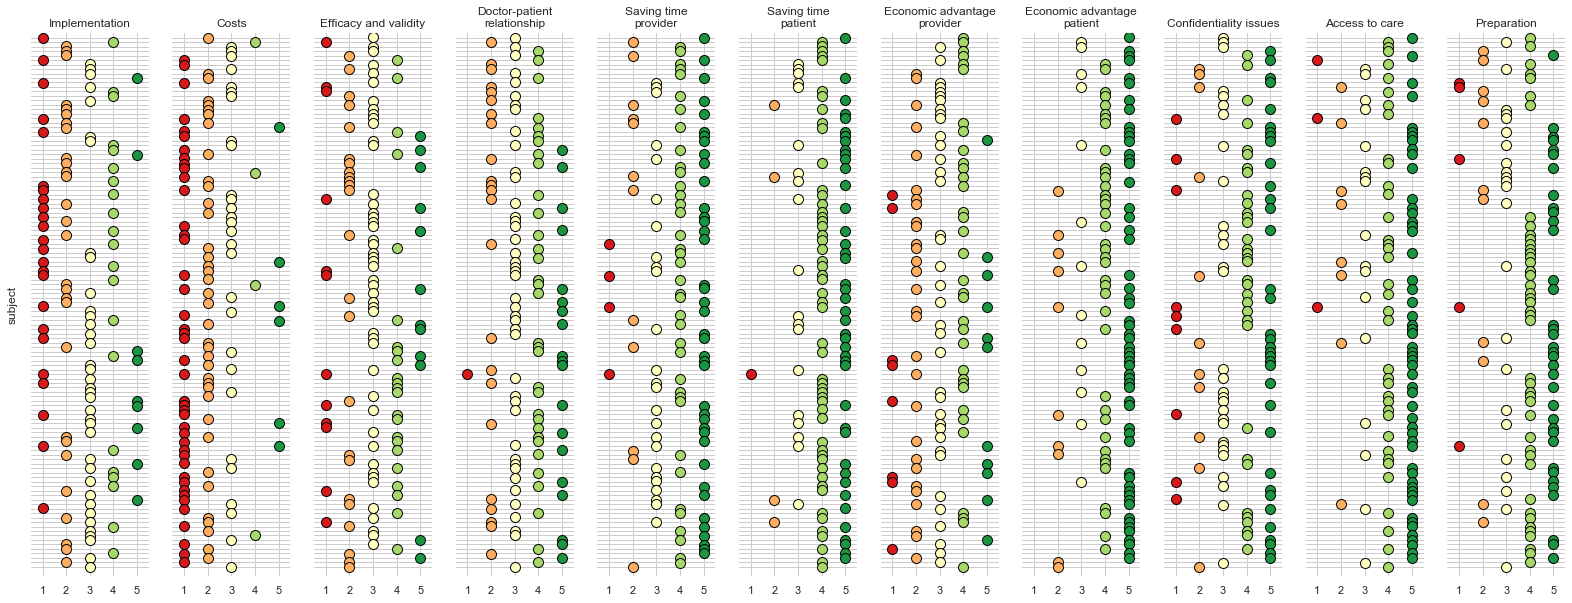

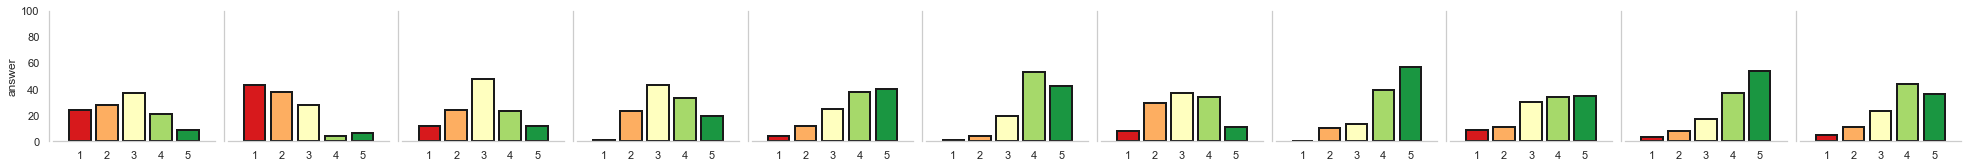

In [43]:
inds = [25,26,27,28,29,30,31,32,33,34,35]
for i,c in enumerate(surv.columns[inds]):
    print(i,c)

likert = surv.iloc[:,inds].dropna(axis=0,how="all").fillna(3) # 1 subject is all nan and 1 subject skipped one item [in this subject the answer is replaced with neutral 3]

likert = likert.reset_index().rename(columns= {"index":"subject"})

import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(likert,
                 x_vars=likert.columns[1:], y_vars=["subject"],
                 height=10, aspect=.25,)


def mystrip(x,y, **kwargs):
    col = {1:'#d7191c',2:'#fdae61',3:'#ffffbf',4:'#a6d96a',5:'#1a9641'}
    sns.stripplot(x, y, edgecolor="black", palette=[col[i] for i in x], size=10, orient="h",
    linewidth=1)
    
# Draw a dot plot using the stripplot function
g.map(mystrip)#color="purple")

g.set(xlim=(0.5, 5.5), ylim=(len(likert)+1.1,-1.1,), xlabel="", xticks=[1,2,3,4,5],yticklabels=[])

# Use semantically meaningful titles for the columns
titles = ['Implementation','Costs','Efficacy and validity','Doctor-patient\nrelationship',
'Saving time\nprovider','Saving time\npatient','Economic advantage\nprovider','Economic advantage\npatient',
'Confidentiality issues','Access to care','Preparation','Satisfaction','Stigma' ]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)


sns.despine(left=True, bottom=True)

plt.show()

likert = surv.iloc[:,inds].dropna(axis=0,how="all").fillna(3)
likert_f = likert.agg(pd.value_counts).fillna(0).reset_index().rename(columns={"index":"answer"})

g = sns.PairGrid(likert_f,
                 x_vars=likert_f.columns[1:], y_vars=["answer"],aspect=1,)

def mybar(x,y, **kwargs):
    col = {1:'#d7191c',2:'#fdae61',3:'#ffffbf',4:'#a6d96a',5:'#1a9641'}
    plt.bar(y,x,color=['#d7191c','#fdae61','#ffffbf','#a6d96a','#1a9641'],edgecolor="k",linewidth=2)

for ax, title in zip(g.axes.flat, titles):


    ax.spines['left'].set_position(('outward', 4))
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

g.map(mybar)
g.set(xlim=(0, 6), ylim=(0,100),xlabel="",xticks=[1,2,3,4,5])

plt.tight_layout()